<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Students-performance-in-exams:-Background" data-toc-modified-id="Students-performance-in-exams:-Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Students performance in exams: Background</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#What-factors-influence-student-performance?" data-toc-modified-id="What-factors-influence-student-performance?-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>What factors influence student performance?</a></span><ul class="toc-item"><li><span><a href="#Gender-and-Students-performance" data-toc-modified-id="Gender-and-Students-performance-1.0.1.1"><span class="toc-item-num">1.0.1.1&nbsp;&nbsp;</span>Gender and Students performance</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Students-performance-in-exams:-Analyses" data-toc-modified-id="Students-performance-in-exams:-Analyses-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Students performance in exams: Analyses</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#This-analysis-seeks-to-explore-the-influence-of-various-economic,-personal,-and-social-factors-on-students'-academic-performance" data-toc-modified-id="This-analysis-seeks-to-explore-the-influence-of-various-economic,-personal,-and-social-factors-on-students'-academic-performance-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>This analysis seeks to explore the influence of various economic, personal, and social factors on students' academic performance</a></span></li></ul></li><li><span><a href="#Aims:" data-toc-modified-id="Aims:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Aims:</a></span></li><li><span><a href="#Data-Attributes:" data-toc-modified-id="Data-Attributes:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Attributes:</a></span></li><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Data-Exploration:" data-toc-modified-id="Data-Exploration:-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Data Exploration:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Preview-data" data-toc-modified-id="Preview-data-2.6.0.1"><span class="toc-item-num">2.6.0.1&nbsp;&nbsp;</span>Preview data</a></span></li><li><span><a href="#Check-Missingness" data-toc-modified-id="Check-Missingness-2.6.0.2"><span class="toc-item-num">2.6.0.2&nbsp;&nbsp;</span>Check Missingness</a></span></li><li><span><a href="#Distribution-of-target-features" data-toc-modified-id="Distribution-of-target-features-2.6.0.3"><span class="toc-item-num">2.6.0.3&nbsp;&nbsp;</span>Distribution of target features</a></span></li><li><span><a href="#Check-labels" data-toc-modified-id="Check-labels-2.6.0.4"><span class="toc-item-num">2.6.0.4&nbsp;&nbsp;</span>Check labels</a></span></li><li><span><a href="#Create-Overall-Score-from-math,-reading-and-writing" data-toc-modified-id="Create-Overall-Score-from-math,-reading-and-writing-2.6.0.5"><span class="toc-item-num">2.6.0.5&nbsp;&nbsp;</span>Create Overall Score from math, reading and writing</a></span></li></ul></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Overall-Performance-by-Gender-and-(Race/ethnicity,-Parental-level-of-education,-lunch-type,-and-test-preparation)" data-toc-modified-id="Overall-Performance-by-Gender-and-(Race/ethnicity,-Parental-level-of-education,-lunch-type,-and-test-preparation)-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Overall Performance by Gender and (Race/ethnicity, Parental level of education, lunch type, and test preparation)</a></span></li><li><span><a href="#Transformation-of-non-normal,-target-feature:-Overall-Score" data-toc-modified-id="Transformation-of-non-normal,-target-feature:-Overall-Score-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Transformation of non-normal, target feature: Overall Score</a></span></li></ul></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Categorical Features</a></span><ul class="toc-item"><li><span><a href="#Create-dummy-variables-from-gender,-race/ethnicity,-lunch,-and-test-preparation-course" data-toc-modified-id="Create-dummy-variables-from-gender,-race/ethnicity,-lunch,-and-test-preparation-course-2.8.1"><span class="toc-item-num">2.8.1&nbsp;&nbsp;</span>Create dummy variables from gender, race/ethnicity, lunch, and test preparation course</a></span></li><li><span><a href="#Recategorize-parental-level-of-education-as-an-ordinal-variable" data-toc-modified-id="Recategorize-parental-level-of-education-as-an-ordinal-variable-2.8.2"><span class="toc-item-num">2.8.2&nbsp;&nbsp;</span>Recategorize parental level of education as an ordinal variable</a></span></li></ul></li><li><span><a href="#Split-data-into-X-and-y-datasets" data-toc-modified-id="Split-data-into-X-and-y-datasets-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Split data into X and y datasets</a></span></li><li><span><a href="#Create-Train-and-Test-Models|" data-toc-modified-id="Create-Train-and-Test-Models|-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Create Train and Test Models|</a></span></li><li><span><a href="#Regression-Analyses" data-toc-modified-id="Regression-Analyses-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Regression Analyses</a></span><ul class="toc-item"><li><span><a href="#Create-different-data-sets,-containing-overall-score,-and-the-individual-scores---math,-reading,-and-writing" data-toc-modified-id="Create-different-data-sets,-containing-overall-score,-and-the-individual-scores---math,-reading,-and-writing-2.11.1"><span class="toc-item-num">2.11.1&nbsp;&nbsp;</span>Create different data sets, containing overall score, and the individual scores - math, reading, and writing</a></span></li><li><span><a href="#Linear-regression-with-overall-score" data-toc-modified-id="Linear-regression-with-overall-score-2.11.2"><span class="toc-item-num">2.11.2&nbsp;&nbsp;</span>Linear regression with overall score</a></span></li><li><span><a href="#From-the-alternative-ols-package-(statsmodels.formula.api)-the-model-metrics-are:" data-toc-modified-id="From-the-alternative-ols-package-(statsmodels.formula.api)-the-model-metrics-are:-2.11.3"><span class="toc-item-num">2.11.3&nbsp;&nbsp;</span>From the alternative ols package (statsmodels.formula.api) the model metrics are:</a></span></li></ul></li><li><span><a href="#Based-on-the-distribution,-scores-below-68-will-be-considered-'Fail',-those-from-68-and-above-will-be-considered-'Pass'" data-toc-modified-id="Based-on-the-distribution,-scores-below-68-will-be-considered-'Fail',-those-from-68-and-above-will-be-considered-'Pass'-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Based on the distribution, scores below 68 will be considered 'Fail', those from 68 and above will be considered 'Pass'</a></span></li><li><span><a href="#Fit-Logistic-Regression-Model" data-toc-modified-id="Fit-Logistic-Regression-Model-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Fit Logistic Regression Model</a></span></li><li><span><a href="#Try-Random-Classifier-to-improve-model" data-toc-modified-id="Try-Random-Classifier-to-improve-model-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Try Random Classifier to improve model</a></span></li><li><span><a href="#XGBoost-with-parental-education-variable-as-dummies" data-toc-modified-id="XGBoost-with-parental-education-variable-as-dummies-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>XGBoost with parental education variable as dummies</a></span></li></ul></li></ul></div>

## Students performance in exams: Background

#### What factors influence student performance?

Well known factors would include studying hard, exercise, doing practice exams, getting a good night's sleep etc. but for the sake of our analysis ahead, our options are limited to the number of predictors/features available: Gender, Race/Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course (close enough to practice exams). Before digging into the main anlysis let's review some literature on associations between each of these predictors and student performance.

##### Gender and Students performance




## Students performance in exams: Analyses
#### This analysis seeks to explore the influence of various economic, personal, and social factors on students' academic performance

### Aims:
1. How to improve students' performance in each test?
2. What major factors influence test scores?
3. What is the effectiveness of test preparation course?

### Data Attributes:
1. Gender
2. Race/Ethnicity
3. Parental Level of Education
4. Lunch
5. Test Preparation Course
6. Math Score
7. Reading Score
8. Writing Score

### Table of Contents
[1. Import Libraries](#importlibraries)
<a href='#importlibraries'> </a><br/>
[2. Import Data](#importdata)<br/>
<a href='#importdata'> </a>
[3. Data Exploration](#dataexploration)
<a href='#dataexploration'> </a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3a. Preview data](#previewdata)
<a href='#previewdata'> </a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3b. Check Missingness](#checkmissingness)
<a href='#checkmissingness'></a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3c. Distribution of target features](#distargetfeatures)
<a href='#distargetfeatures'></a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3d. Check labels](#checklabels)
<a href='#checklabels'></a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3e. Create Overall Score from math, reading and writing](#createoverallscore)
<a href='#createoverallscore'></a><br/>
[4. Data Visualization](#dataviz)
    <a href='#dataviz'> </a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4a. Overall Performance by Gender and (Race/ethnicity, Parental level of education, lunch type, and test preparation)](#dataviz)
    <a href='#dataviz'> </a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4b. Transformation of non-normal, target feature: Overall Score](#transform)
    <a href='#transform'></a><br/>
[5. Categorical Features](#cat)
    <a href='#cat'> </a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5a. Create dummy variables from  gender, race/ethnicity, lunch, and test preparation course](#dummy)
    <a href='#dummy'></a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5b. Recategorize parental level of education as an ordinal variable](#ordinal)
    <a href='#ordinal'></a><br/>

<a id='importlibraries'></a>

### Import Libraries

In [76]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='importdata'></a>

### Import Data

In [77]:
df=pd.read_csv('StudentsPerformance.csv')

<a id='dataexploration'></a>

### Data Exploration: 

1. Preview data
2. Check Missingness
3. Distribution of target features
4. Check labels
5. Create Overall Score from math, reading and writing

<a id='previewdata'></a>

##### Preview data

In [78]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<a id='checkmissingness'></a>

##### Check Missingness

In [79]:
df.info()
# There are 1000 rows of data and 8 columns/features
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


False

<a id='distargetfeatures'></a>

##### Distribution of target features

In [80]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<a id='checklabels'></a>

##### Check labels

In [81]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<a id='createoverallscore'></a>

##### Create Overall Score from math, reading and writing

In [82]:
# For easy and more succint analyses, we'll use a single score.
# Create a final/overall score from math, reading, and writing

df['overall score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


 <a id='dataviz'> </a>

### Data Visualization
#### Overall Performance by Gender and (Race/ethnicity, Parental level of education, lunch type, and test preparation)


In [83]:
df['overall score'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: overall score, dtype: float64

C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


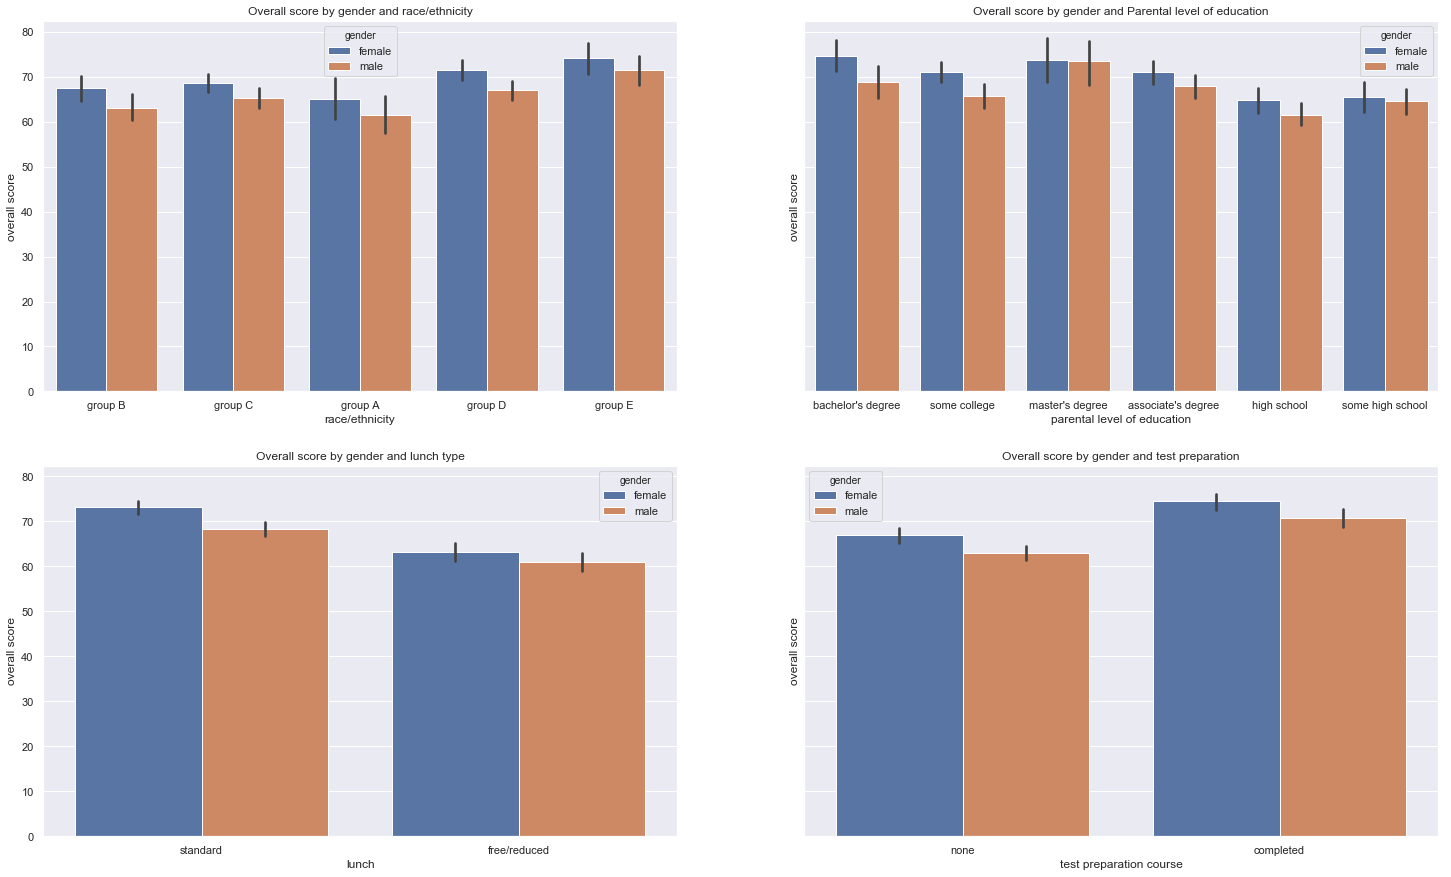

In [84]:
#Explore scores by parental level of education
fig, axs = plt.subplots(ncols=2, nrows=2,  figsize=(25, 15), sharey = True)
sns.barplot(x=df['race/ethnicity'], y=df['overall score'], hue=df['gender'], ax=axs[0][0]).set_title('Overall score by gender and race/ethnicity')
sns.barplot(x=df['parental level of education'], y=df['overall score'], hue=df['gender'], ax=axs[0][1]).set_title('Overall score by gender and Parental level of education')
sns.barplot(x=df['lunch'], y=df['overall score'], hue=df['gender'], ax=axs[1][0]).set_title('Overall score by gender and lunch type')
sns.barplot(x=df['test preparation course'], y=df['overall score'], hue=df['gender'], data=df, ax=axs[1][1]).set_title('Overall score by gender and test preparation')

plt.show()

<a id='transform'></a>

#### Transformation of non-normal, target feature: Overall Score

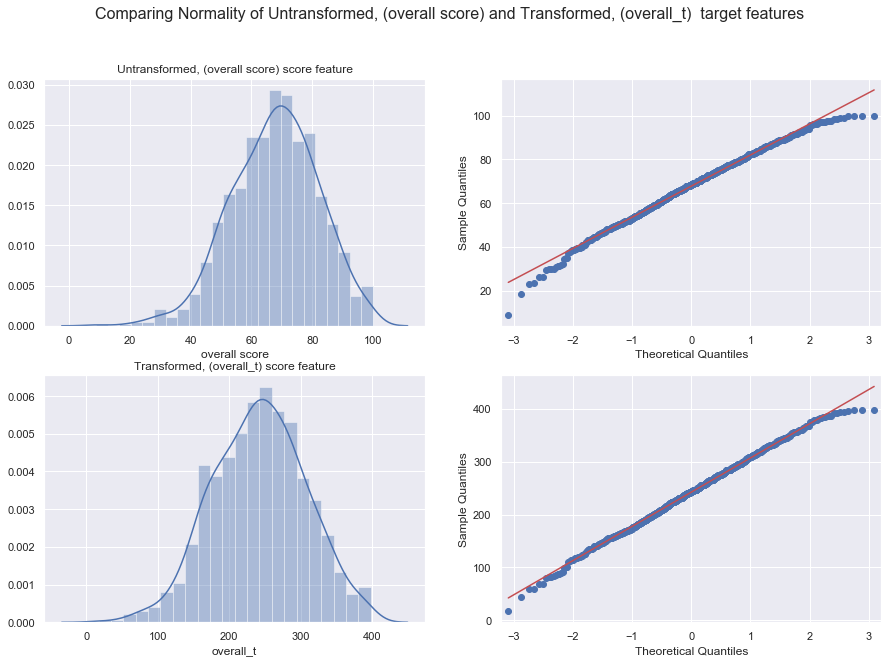

<Figure size 360x3600 with 0 Axes>

overall score - Reject null. Not normal
p=0.0005 

overall_t - Fail to reject null. Normal
p=0.2498 



In [85]:

import math as m
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

def transform_vars(untransformed, transformed):
    # Transformation of math score
    x = lambda x: (m.pow(x,1.3))
    df_t = df['{}'.format(untransformed)].apply(x)
    df['{}'.format(transformed)] = pd.Series(df_t, index=df.index) 

    
# Plot both Untransformed and Transformed plots of test performance
def compare_normality(untransformed, transformed):
    fig, axs = plt.subplots(ncols=2, nrows = 2, figsize=(15, 10))
    plt.figure(figsize=(5,50))
    f = sns.distplot(df['{}'.format(untransformed)], ax=axs[0][0]).set_title('Untransformed, ({}) score feature'.format(untransformed))
    f = sns.distplot(df['{}'.format(transformed)], ax=axs[1][0]).set_title('Transformed, ({}) score feature'.format(transformed))
    f = qqplot(df['{}'.format(untransformed)], line='s', ax=axs[0][1]) 
    f = qqplot(df['{}'.format(transformed)], line='s', ax=axs[1][1]) 
    fig.suptitle('Comparing Normality of Untransformed, ({}) and Transformed, ({})  target features'.format(untransformed, transformed), fontsize=16)

    plt.show()
    
#Test the normality of the original and transformed scores
def checkNormal(var):
    k2, p = stats.normaltest(df['{}'.format(var)])
    alpha = 0.05
    if p < alpha:
        print(var,"- Reject null. Not normal")
    else:
        print(var,"- Fail to reject null. Normal")
    p = round(p,4)    
    print ("p={}".format(p), "\n")


transform_vars('overall score', 'overall_t')
compare_normality('overall score','overall_t')
checkNormal('overall score') 
checkNormal('overall_t') 



<a id='cat'></a>
<a id='dummy'></a>

### Categorical Features
#### Create dummy variables from gender, race/ethnicity, lunch, and test preparation course

In [86]:
#before spliting data, create dummies for categorical variables (drop first column of each dummy group to avoid multicollinearity)
df_d = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'lunch', 'test preparation course'], drop_first=True)
df2 = df_d.drop(['math score', 'writing score', 'reading score', 'overall_t'], axis=1)
df2.head()

,parental level of education,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,bachelor's degree,72.666667,0,1,0,0,0,1,1
1,some college,82.333333,0,0,1,0,0,1,0
2,master's degree,92.666667,0,1,0,0,0,1,1
3,associate's degree,49.333333,1,0,0,0,0,0,1
4,some college,76.333333,1,0,1,0,0,1,1


<a id='ordinal'></a>

#### Recategorize parental level of education as an ordinal variable

In [87]:
df2['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [88]:
#Recategorize the parental education to reflect it's ordinal nature

recat_parent_ed = {"some high school":1,
                                      "high school":2,
                                      "some college":3,
                                      "associate's degree":4,
                                      "bachelor's degree":5,
                                      "master's degree":6}

#Then, replace the feature in the DataFrame
df2.replace(recat_parent_ed, inplace=True)
df2.head()


,parental level of education,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,5,72.666667,0,1,0,0,0,1,1
1,3,82.333333,0,0,1,0,0,1,0
2,6,92.666667,0,1,0,0,0,1,1
3,4,49.333333,1,0,0,0,0,0,1
4,3,76.333333,1,0,1,0,0,1,1


In [89]:
df2.dtypes

parental level of education       int64
overall score                   float64
gender_male                       uint8
race/ethnicity_group B            uint8
race/ethnicity_group C            uint8
race/ethnicity_group D            uint8
race/ethnicity_group E            uint8
lunch_standard                    uint8
test preparation course_none      uint8
dtype: object

In [90]:
df2["parental level of education"] = df2["parental level of education"].astype('category')
df2["parental education"] = df2["parental level of education"].cat.codes



In [91]:
df2 = df2.drop(['parental level of education'], axis=1)
df2.head()

,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none,parental education
0,72.666667,0,1,0,0,0,1,1,4
1,82.333333,0,0,1,0,0,1,0,2
2,92.666667,0,1,0,0,0,1,1,5
3,49.333333,1,0,0,0,0,0,1,3
4,76.333333,1,0,1,0,0,1,1,2


### Split data into X and y datasets

In [92]:
# Split data into x and y
X = df2.drop(['overall score'], axis=1)
y = df2['overall score']

### Create Train and Test Models|

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### Regression Analyses

In [106]:
#Create data containing overall score
df_overall = df.drop(['math score', 'writing score', 'reading score', 'overall_t'], axis=1)
df_overall.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


#### Create different data sets, containing overall score, and the individual scores - math, reading, and writing

In [97]:
df_mwr = df.drop(['overall score','overall_t'], axis=1)
df_mwr.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [103]:

y_math = df_mwr[['math score']].copy()
y_read = df_mwr[['reading score']].copy()
y_write = df_mwr[['writing score']].copy()



#### Linear regression with overall score

In [105]:
from sklearn.model_selection import train_test_split

X_ = df3.drop(['overall score'], axis=1)
y_ = df3['overall score']


# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_, y_, test_size=0.3, random_state=101)
df_train, X_test1, y_train1, y_test1 = train_test_split(X_, y_, test_size=0.3, random_state=101)

dfTrain = pd.concat([y_train1, X_train1], axis=1, sort=False)
dfTest = pd.concat([y_test1, X_test1], axis=1, sort=False)

dfTest.head()

NameError: name 'X_train1' is not defined

In [104]:
# Try regression model without dummy coding
from statsmodels.formula.api import ols
from patsy.builtins import *


#Test models for overall scores for train data
fit1 = ols("Q('overall score') ~ C(gender) + C(lunch) + C(Q('race/ethnicity')) + C(Q('parental level of education')) + C(Q('test preparation course'))", data=dfTrain).fit()
fit1.summary()

NameError: name 'dfTrain' is not defined

In [53]:
y_pred = fit1.predict(X_test1)
def toFrame(ySeries, yname):
    y = pd.DataFrame(ySeries, columns = ['{}'.format(yname)])
    return y
     


#Convert Series to DataFrame for easier use
y_pred1 = toFrame(y_pred, 'predicted overall score')
y_test1 = toFrame(dfTest['overall score'],'overall score')



In [54]:
import math as m
dfTrue_Pred = pd.concat([y_test1, y_pred1], axis=1, sort=False)
 
def RMSE(true, predicted):
    global MSE, RMSE
    SE = (true - predicted).apply(lambda x: (m.pow((x),2)))
    SSE = (SE.sum())
    n = len(SE)
    MSE = SSE/n;
    RMSE = m.sqrt(MSE)
    return RMSE


round(RMSE(dfTrue_Pred['overall score'], dfTrue_Pred['predicted overall score']),4)

12.5058

#### From the alternative ols package (statsmodels.formula.api) the model metrics are:
    R-Squared: 0.256
    AIC: 5540
    BIC: 5599
    RMSE: 12.51

In [73]:
"""***********Linear Regression sections***************"""

'***********Linear Regression sections***************'

C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


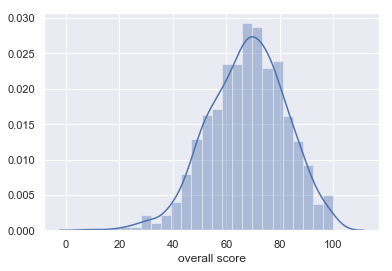

In [40]:
sns.set()
y_dist = sns.distplot(y)

In [41]:
y.describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: overall score, dtype: float64

### Based on the distribution, scores below 68 will be considered 'Fail', those from 68 and above will be considered 'Pass'

In [42]:
from sklearn.preprocessing import Binarizer

Binarizer(threshold=68.333332, copy=True)

Binarizer(copy=True, threshold=68.333332)

In [43]:
# y.reshape(1, -1)
# transformer = Binarizer().fit(X,y)
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: overall score, dtype: float64

In [44]:
bins = [0,68.3333, np.inf]
names=[0,1]
y_bin=pd.cut(y,bins, labels = names)

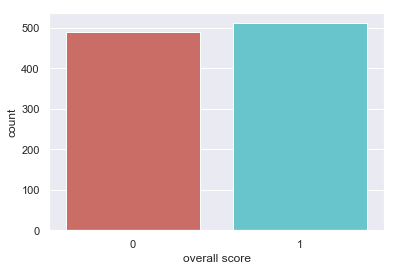

In [45]:
#Check distribution of new pass/fail variable from overall
# student performance
sns.countplot(x=y_bin, palette='hls')
plt.show()

In [46]:
# Check that the target feature is balanced
y_bin.value_counts()

1    511
0    489
Name: overall score, dtype: int64

In [47]:
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=105)

### Fit Logistic Regression Model

In [48]:
from sklearn.linear_model import LogisticRegression
logM = LogisticRegression()
logM.fit(X_train, y_train_bin)
pred_bin = logM.predict(X_test)


C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin,pred_bin))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       142
           1       0.70      0.65      0.67       158

   micro avg       0.67      0.67      0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300



In [50]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_bin, pred_bin))
print("Precision:",metrics.precision_score(y_test_bin, pred_bin))
print("Recall:",metrics.recall_score(y_test_bin, pred_bin))


Accuracy: 0.6666666666666666
Precision: 0.6959459459459459
Recall: 0.6518987341772152


### Try Random Classifier to improve model

In [51]:
 # Now, try RF Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
forest_reg = RandomForestRegressor(n_estimators=10,criterion='mse',random_state=101)

In [53]:
y_train_bin.head()

298    0
714    0
948    0
118    0
80     0
Name: overall score, dtype: category
Categories (2, int64): [0 < 1]

In [54]:
# y2 = pd.DataFrame(y_train_bin.astype(int))
y3 = y_train_bin.ravel()

In [55]:
classifier=RandomForestClassifier(n_estimators=1000, n_jobs=100, max_features=None)
# y_trainy_train_bin.astype(int)
classifier.fit(X_train,y3)

#    - If int, then consider `max_features` features at each split.
#     - If float, then `max_features` is a fraction and
#       `int(max_features * n_features)` features are considered at each
#       split.
#     - If "auto", then `max_features=sqrt(n_features)`.
#     - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
#     - If "log2", then `max_features=log2(n_features)`.
#     - If None, then `max_features=n_features`.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=100,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
#Apply classifier to test data
print('Random Forest R squared": %.4f' % classifier.score(X_test, y_test_bin))
# classifier.predict(X_test)

Random Forest R squared": 0.5433


### XGBoost with parental education variable as dummies

In [56]:
# df_d = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'lunch', 'test preparation course'], drop_first=True)
# df_ped = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'lunch', 'test preparation course', 'parental level of education'], drop_first=True)

In [57]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
# from sklearn.grid_search import GridSearchCV
clf = xgb.XGBClassifier( learning_rate =0.05, n_estimators=1000, max_depth=10, min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.9,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=10)

In [58]:

clf.fit(X_train, y_train_bin, early_stopping_rounds=15,  eval_metric="logloss", eval_set=[(X_test, y_test_bin)])

[0]	validation_0-logloss:0.689474
Will train until validation_0-logloss hasn't improved in 15 rounds.
[1]	validation_0-logloss:0.684448
[2]	validation_0-logloss:0.681735
[3]	validation_0-logloss:0.677997
[4]	validation_0-logloss:0.674564
[5]	validation_0-logloss:0.671449
[6]	validation_0-logloss:0.668319
[7]	validation_0-logloss:0.667071
[8]	validation_0-logloss:0.665433
[9]	validation_0-logloss:0.66469
[10]	validation_0-logloss:0.662864
[11]	validation_0-logloss:0.662748
[12]	validation_0-logloss:0.661312
[13]	validation_0-logloss:0.660588
[14]	validation_0-logloss:0.660087
[15]	validation_0-logloss:0.658711
[16]	validation_0-logloss:0.658442
[17]	validation_0-logloss:0.658113
[18]	validation_0-logloss:0.658906
[19]	validation_0-logloss:0.659022
[20]	validation_0-logloss:0.658808
[21]	validation_0-logloss:0.659245
[22]	validation_0-logloss:0.659379
[23]	validation_0-logloss:0.659817
[24]	validation_0-logloss:0.660041
[25]	validation_0-logloss:0.659998
[26]	validation_0-logloss:0.66045

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=True,
       subsample=0.9)

In [59]:
def best_ntree_score(estimator, X, y):
    """
    This scorer uses the best_ntree_limit to return
    the best AUC ROC score
    """
    try:
        y_predict = clf.predict_proba(X,ntree_limit=clf.best_ntree_limit)
    except AttributeError:
        y_predict = clf.predict_proba(X_test)
    return roc_auc_score(y, y_predict[:, 1])


print ('AUC ROC Score:',round((best_ntree_score(clf, X_train, y3)*100),4))

AUC ROC Score: 80.1745


In [60]:
print(clf.feature_importances_)

[0.05442518 0.04491559 0.03052007 0.04472649 0.0611552  0.40437612
 0.305075   0.05480641]


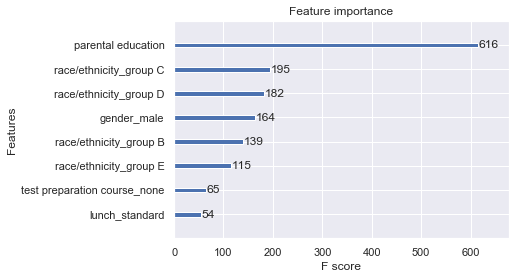

In [61]:

xgb.plot_importance(clf)
plt.show()

In [62]:
# from sklearn.feature_selection import RFE
# model = LogisticRegression()
# # create the RFE model and select 8 attributes
# rfe = RFE(model, 3)
# rfe = rfe.fit(X_train, y_train_bin)
# # summarize the selection of the attributes
# print('Selected features: %s' % list(X.columns[rfe.ranking_]))

In [70]:
import shap
shap.initjs()
model = xgb.train({"learning_rate": 0.01}, xgb.DMatrix(X_train, label=y_train_bin), 100)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

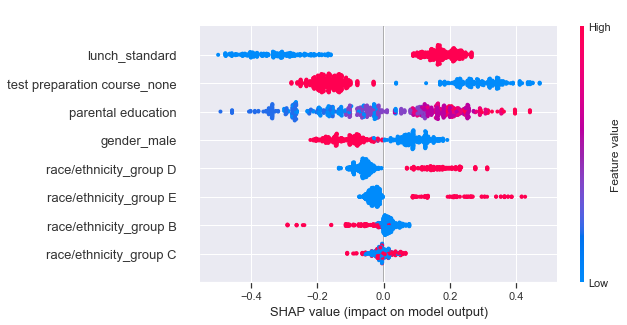

In [71]:
shap.summary_plot(shap_values, X_train)

In [72]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [58]:
clf = xgb.XGBClassifier( learning_rate =0.05, n_estimators=1000, max_depth=10, min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.9,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=10)

In [66]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
# ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
#              'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(learning_rate =0.05, n_estimators=1000, max_depth=10, min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.9,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=10), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [72]:
y_validation = y_test_bin.ravel()
optimized_GBM.fit(X_test, y_validation)

C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=True,
       subsample=0.9),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
optimized_GBM.best_score_

0.65